## Package imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [13]:
heart_df = pd.read_csv('data/heart.csv')
heart_df.head()

,age,sex,chest pain type,resting blood pressure,chol,fasting blood sugar,resting ECG,max heart rate,exang,oldpeak,slope,number vessels flourosopy,thal,target
0,63,1,3,145,233,1,0,150.0,0,-99.99,0,0,1,1
1,37,1,2,130,250,0,1,187.0,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,NaN,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178.0,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163.0,1,0.60,2,0,2,1


I don't like the spaces in the column names, getting rid

In [14]:
heart_df.columns = heart_df.columns.str.replace(' ', '_')

In [15]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    int64  
 2   chest_pain_type            303 non-null    int64  
 3   resting_blood_pressure     303 non-null    int64  
 4   chol                       303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    int64  
 6   resting_ECG                303 non-null    int64  
 7   max_heart_rate             274 non-null    float64
 8   exang                      303 non-null    int64  
 9   oldpeak                    303 non-null    float64
 10  slope                      303 non-null    int64  
 11  number_vessels_flourosopy  303 non-null    int64  
 12  thal                       303 non-null    int64  
 13  target                     303 non-null    int64  

Looks like some null values in the max heart rate column

In [16]:
heart_df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,chol,fasting_blood_sugar,resting_ECG,max_heart_rate,exang,oldpeak,slope,number_vessels_flourosopy,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,274.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.978102,0.326733,-6.617723,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.767327,0.469794,26.828542,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,-99.990000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


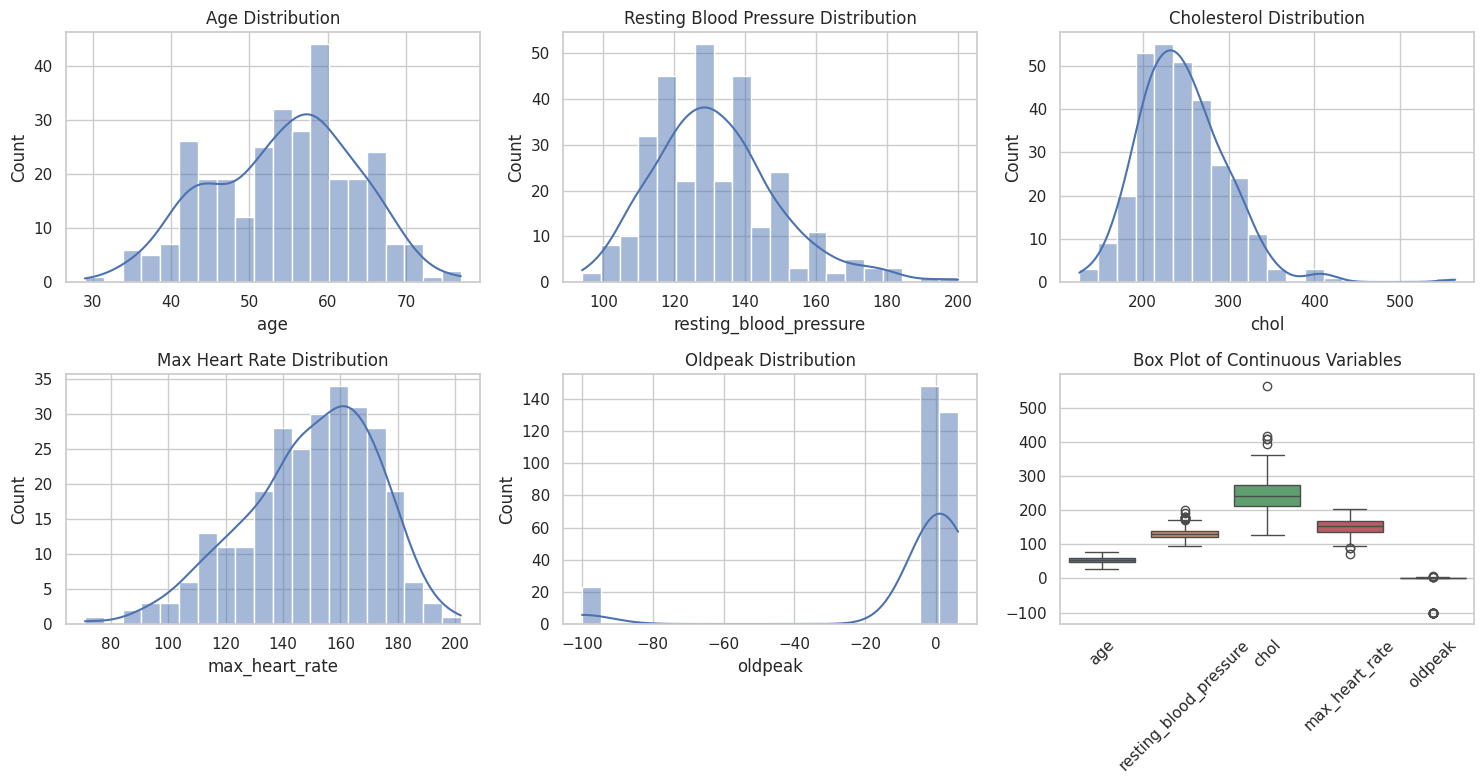

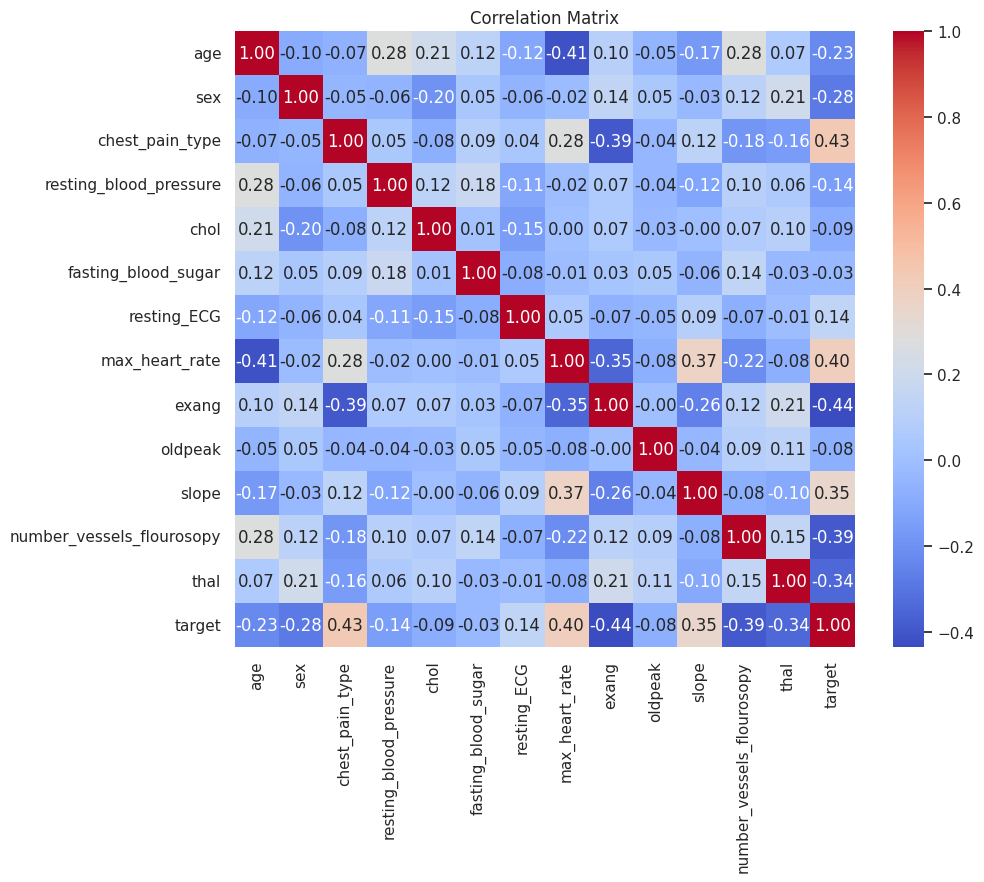

In [17]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# histograms for continuous variables
sns.histplot(heart_df['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(heart_df['resting_blood_pressure'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Resting Blood Pressure Distribution')

sns.histplot(heart_df['chol'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Cholesterol Distribution')

sns.histplot(heart_df['max_heart_rate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Max Heart Rate Distribution')

sns.histplot(heart_df['oldpeak'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Oldpeak Distribution')

# box plot to look for outliers
sns.boxplot(data=heart_df[['age', 'resting_blood_pressure', 'chol', 'max_heart_rate', 'oldpeak']], ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Continuous Variables')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heart_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Hmm, quite a few values of 'oldpeak' at -99.99, seems to be an outlier, but I have no idea what oldpeak is, os I can't say for sure. It has low correlation with the targetm so I'm temoted to just drop it for now until/unless we get clarification from the client.

## Exploring data cleaning

In [18]:
heart_df.drop('oldpeak', axis=1, inplace=True)

# impute missing values in max_heart_rate with the median
heart_df['max_heart_rate'].fillna(heart_df['max_heart_rate'].median(), inplace=True)

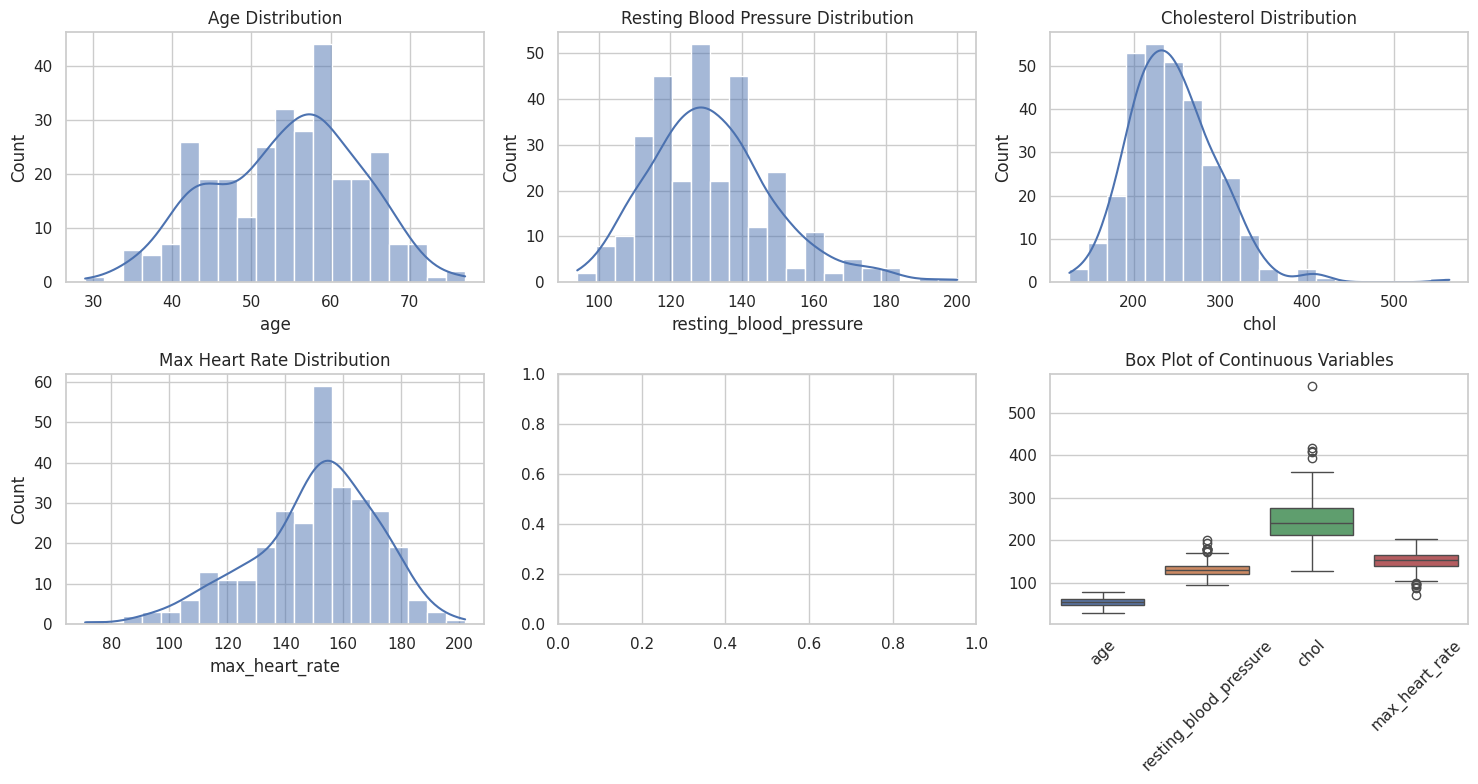

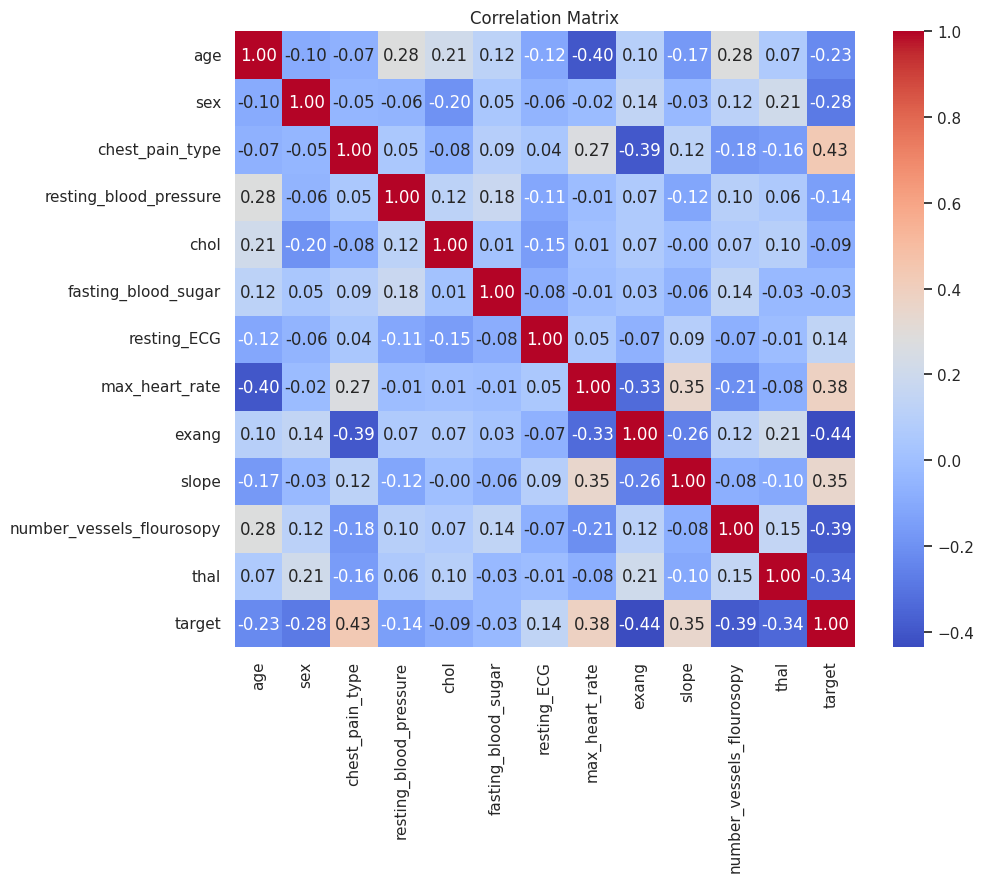

In [21]:
# Remake plots after cleaning
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# histograms for continuous variables
sns.histplot(heart_df['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(heart_df['resting_blood_pressure'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Resting Blood Pressure Distribution')

sns.histplot(heart_df['chol'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Cholesterol Distribution')

sns.histplot(heart_df['max_heart_rate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Max Heart Rate Distribution')

# box plot to look for outliers
sns.boxplot(data=heart_df[['age', 'resting_blood_pressure', 'chol', 'max_heart_rate']], ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Continuous Variables')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heart_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()